In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train-images-idx3-ubyte', 'train-labels-idx1-ubyte', 't10k-labels-idx1-ubyte', 'fashion-mnist_train.csv', 't10k-images-idx3-ubyte', 'fashion-mnist_test.csv']


In [71]:
train=pd.read_csv('../input/fashion-mnist_train.csv')
test=pd.read_csv('../input/fashion-mnist_test.csv')

In [72]:
train.head(5)



,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [73]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
img_row,img_col=28,28
input_shape=img_row,img_col,1

In [74]:
X=np.array(train.iloc[:,1:])
Y=to_categorical(train.iloc[:,0])
print(X[:5])
print(Y[:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [75]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2,random_state=13)

In [76]:
X_test=np.array(test.iloc[:,1:])
Y_test=to_categorical(test.iloc[:,0])

In [77]:
X_train.shape

(48000, 784)

In [78]:
X_train=X_train.reshape(X_train.shape[0],img_row,img_col,1)
X_test=X_test.reshape(X_test.shape[0],img_row,img_col,1)
X_val=X_val.reshape(X_val.shape[0],img_row,img_col,1)

In [79]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_val=X_val.astype('float32')
X_train/=255
X_test/=255
X_val/=255


In [80]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [86]:
batch_size=256
num_classes=10
epochs=50

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))

model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
          
model.add(Conv2D(128,kernel_size=(3,3),
                 activation='relu'))
#model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

In [82]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [87]:
history=model.fit(X_train,Y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(X_val,Y_val))
score=model.evaluate(X_test,Y_test,verbose=0)


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 48s 1ms/step - loss: 0.9933 - acc: 0.6250 - val_loss: 0.5675 - val_acc: 0.7817
Epoch 2/50
48000/48000 [==============================] - 46s 950us/step - loss: 0.5946 - acc: 0.7755 - val_loss: 0.4709 - val_acc: 0.8233
Epoch 3/50
48000/48000 [==============================] - 46s 968us/step - loss: 0.5128 - acc: 0.8104 - val_loss: 0.4155 - val_acc: 0.8471
Epoch 4/50
48000/48000 [==============================] - 46s 955us/step - loss: 0.4684 - acc: 0.8276 - val_loss: 0.3876 - val_acc: 0.8550
Epoch 5/50
48000/48000 [==============================] - 46s 948us/step - loss: 0.4347 - acc: 0.8411 - val_loss: 0.3464 - val_acc: 0.8720
Epoch 6/50
48000/48000 [==============================] - 46s 949us/step - loss: 0.4029 - acc: 0.8530 - val_loss: 0.3331 - val_acc: 0.8773
Epoch 7/50
48000/48000 [==============================] - 46s 961us/step - loss: 0.3846 - acc: 0.8608 - val_loss: 0.31

In [88]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1965605954706669
Test accuracy: 0.9256


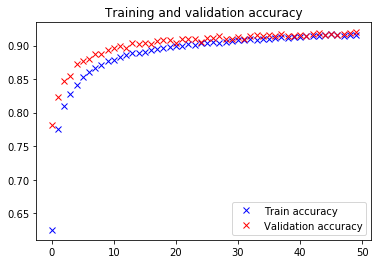

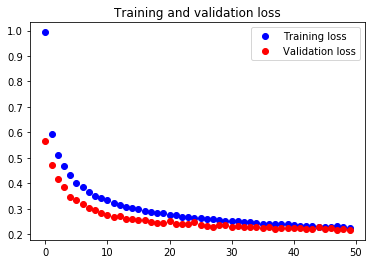

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bx',label='Train accuracy')
plt.plot(epochs,val_acc,'rx',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [130]:
predicted_classes = model.predict_classes(X_test)
Y_true = test.iloc[:, 0]
correct = np.nonzero(predicted_classes==Y_true)[0]
incorrect = np.nonzero(predicted_classes!=Y_true)[0]

In [112]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(Y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.90      0.88      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.89      0.88      0.89      1000
     Class 3       0.92      0.95      0.93      1000
     Class 4       0.88      0.91      0.89      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.82      0.73      0.77      1000
     Class 7       0.94      0.98      0.96      1000
     Class 8       0.98      0.99      0.99      1000
     Class 9       0.97      0.96      0.97      1000

   micro avg       0.93      0.93      0.93     10000
   macro avg       0.93      0.93      0.92     10000
weighted avg       0.93      0.93      0.92     10000



In [125]:
print(correct[:9])

IndexError: invalid index to scalar variable.

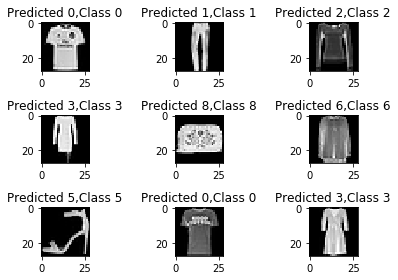

In [131]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28),cmap='gray',interpolation='none')
    plt.title("Predicted {},Class {}".format(predicted_classes[correct],Y_true[correct]))
    plt.tight_layout()
    

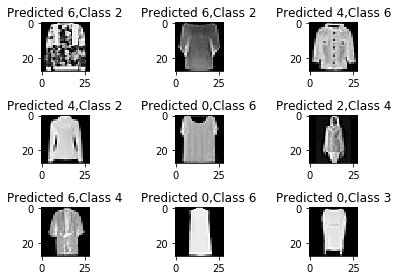

In [132]:
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28),cmap='gray',interpolation='none')
    plt.title("Predicted {},Class {}".format(predicted_classes[incorrect],Y_true[incorrect]))
    plt.tight_layout()

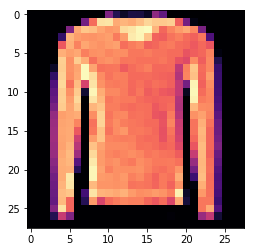

In [133]:
test_im=X_train[154]
plt.imshow(test_im.reshape(28,28),cmap='magma',interpolation='none')
plt.show()

In [ ]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
#print(layer_outputs)
activation_model=models.Model(input=model.input,output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  after removing the cwd from sys.path.
